# Nome: Raylander Marques Melo
# Matrícula: 586108

In [1]:
import numpy as np
import matplotlib.pyplot as plt  # Biblioteca para gerar gráficos

# Questão 1: Considere o conjunto de dados disponível em artificial1d.csv organizado em duas colunas, x e y. Seja um modelo de regressão linear para ŷ = f(x).

In [ ]:
# Carregar o conjunto de dados artificial
artificial_dataset = np.loadtxt('artificial1d.csv', delimiter=',', skiprows=1)
# Printar o conjunto de dados
artificial_dataset

array([[-0.93103448, -1.32698023],
       [-0.86206897, -1.10559772],
       [-0.79310345, -0.87394576],
       [-0.72413793, -0.28502695],
       [-0.65517241, -0.43115252],
       [-0.5862069 , -0.79475402],
       [-0.51724138, -0.88606806],
       [-0.44827586, -0.89989978],
       [-0.37931034, -0.86184365],
       [-0.31034483, -0.88805183],
       [-0.24137931, -1.23595129],
       [-0.17241379, -0.71956827],
       [-0.10344828, -0.45202286],
       [-0.03448276,  0.09889951],
       [ 0.03448276,  0.34896973],
       [ 0.10344828,  0.09747797],
       [ 0.17241379,  0.70019809],
       [ 0.24137931,  1.31051213],
       [ 0.31034483,  1.00177576],
       [ 0.37931034,  1.00318231],
       [ 0.44827586,  1.14910129],
       [ 0.51724138,  1.59220607],
       [ 0.5862069 ,  0.60909009],
       [ 0.65517241,  0.59441623],
       [ 0.72413793,  0.70300732],
       [ 0.79310345,  0.82332241],
       [ 0.86206897,  1.10646439],
       [ 0.93103448,  1.42295695],
       [ 1.        ,

## Questão 1 a) Apresente os parâmetros do modelo e o MSE (erro quadrático médio) obtidos pelo algoritmo OLS (mínimos quadrados ordinários). Plote a reta resultante sobre os dados.

OLS com o dataset artificial1d

Parâmetros do modelo: [[0.08956111]
 [1.51328267]]
RMSE: 0.4557547135753802
MSE: 0.20771235894617687


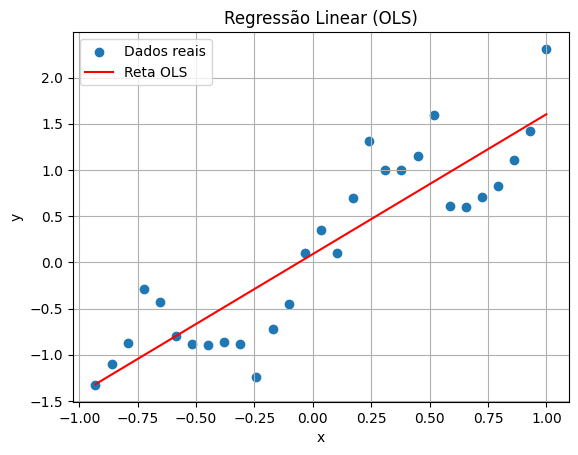

In [ ]:
# Cria uma cópia do conjunto de dados
dataset = artificial_dataset.copy()

# Adiciona uma coluna de 1s para o termo de bias
X = np.c_[np.ones(dataset.shape[0]),dataset[:,[0]]]
# Pega a coluna do y o target
y = dataset[:,[1]]

# Realiza o treino do modelo de regressão linear OLS
w = np.linalg.inv(X.T @ X )@ X.T @ y

# Realiza a predição
ypred = X @ w

# Calcula o erro quadrático médio (RMSE e MSE)
rmse = np.sqrt(np.mean((y-ypred)**2))
mse = np.mean((y-ypred)**2)

# Printar os parâmetros do modelo e o erro
print("Parâmetros do modelo:", w)
print("RMSE:",rmse)
print("MSE:",mse)

# Plotar os dados e a reta de regressão
plt.scatter(dataset[:, 0], dataset[:, 1], label='Dados reais')
plt.plot(dataset[:, 0], ypred, color='red', label='Reta OLS')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Linear (OLS)')
plt.legend()
plt.grid(True)
plt.show()

## Questão 1 b) presente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo GD (gradiente descendente). Plote a reta resultante sobre os dados.

#### Os dados não foram normalizados pois eles já estão entre -1 e 1.

GD com o dataset artificial1d

Parâmetros do modelo: [[0.08966088]
 [1.51135109]]
RMSE: 0.455756086676119
MSE: 0.20771361054233012


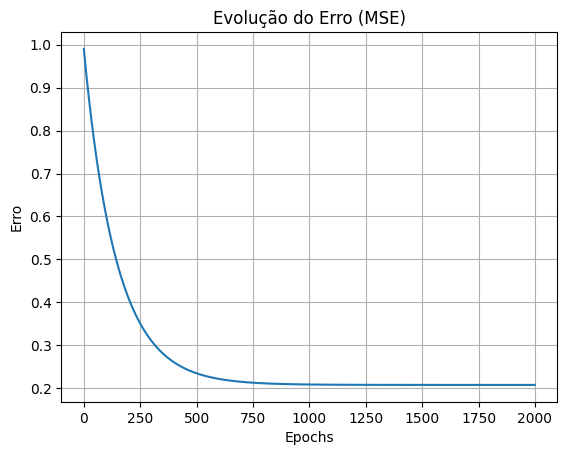

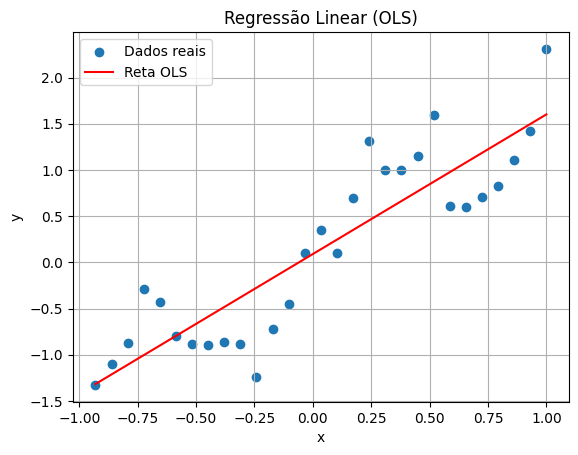

In [79]:
# Armazena a quantidade de linhas do dataset
N = artificial_dataset.shape[0]

# Adiciona uma coluna de 1s para o termo de bias
X = np.c_[np.ones(artificial_dataset.shape[0]),artificial_dataset[:,[0]]]
# Pega a coluna do y o target
y = artificial_dataset[:,[1]]

# Cria um vetor de pesos inicializado com zeros de tamanho igual ao número de colunas de X
w = np.zeros((X.shape[1],1))

# Cria um vetor para armazenar os pesos históricos
historic_w = []

# Inicializa os parâmetros de aprendizado
# alpha = taxa de aprendizado
alpha = 0.01
# epochs = número de épocas
epochs = 2000

# Inicializa uma lista para armazenar os erros
losses = []

# Loop de treinamento
for i in range(epochs):
    # Realiza a predição
    ypred = X @ w
    # Calcula o gradiente
    grad = (1/N) * (X.T @ (y - X @ w))
    # Calcula os pesos atualizados
    w = w + alpha * grad
    # adiciona os pesos históricos
    historic_w.append(w.flatten().copy())
    # Calcula o erro quadrático médio MSE
    losses.append(np.mean((y-ypred)**2))

# Printar os parâmetros do modelo e o erro
print("Parâmetros do modelo:", w)
print("RMSE:", np.sqrt(losses[-1]))
print("MSE:", losses[-1])

# Plota a evolução do erro
plt.plot(losses)
plt.title('Evolução do Erro (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Erro')
plt.grid(True)
plt.show()

# Plotar os dados e a reta de regressão
plt.scatter(artificial_dataset[:, 0], artificial_dataset[:, 1], label='Dados reais')
plt.plot(artificial_dataset[:, 0], ypred, color='red', label='Reta OLS')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Linear (OLS)')
plt.legend()
plt.grid(True)
plt.show()

## Questão 1 c) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo SGD (gradiente descendente estocástico). Plote a reta resultante sobre os dados.

SGD com o dataset artificial1d

Parâmetros do modelo: [[0.08448667]
 [1.51121775]]
RMSE: 0.4557853181695108
MSE: 0.20774025625888218


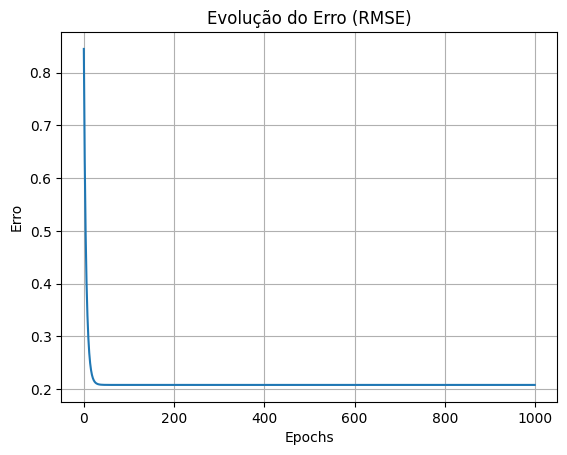

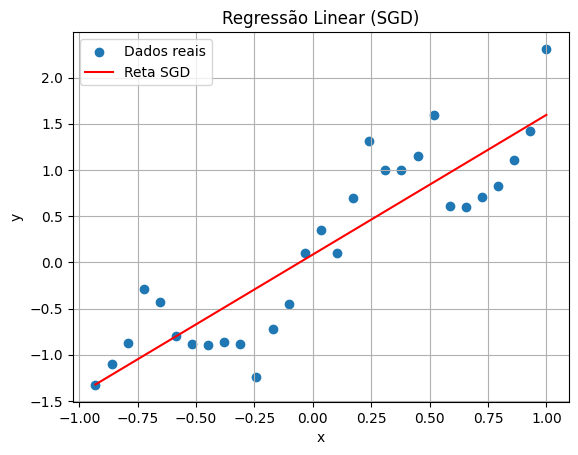

In [76]:
# Armazena a quantidade de linhas do dataset
N = artificial_dataset.shape[0]

# Adiciona uma coluna de 1s para o termo de bias
X = np.c_[np.ones(artificial_dataset.shape[0]),artificial_dataset[:,[0]]]
# Pega a coluna do y o target
y = artificial_dataset[:,[1]]

# Cria um vetor de pesos inicializado com zeros de tamanho igual ao número de colunas de X
w = np.zeros((X.shape[1],1))

# Cria um vetor para armazenar os pesos históricos
historic_w = []
# Inicializa os parâmetros de aprendizado
# alpha = taxa de aprendizado
alpha = 0.01
# epochs = número de épocas
epochs = 1000

# Inicializa uma lista para armazenar os erros
losses = []

# Randomiza a ordem dos dados
N = np.random.permutation(N)

# Loop de treinamento
for epochs in range(epochs):
    # Percorre os dados em ordem aleatória
    for i in N:
        # Pega o i-ésimo dado
        xi = X[i,:].reshape((1,-1))
        # Pega o i-ésimo target
        yi = y[i]
        # Realiza a predição
        ypredi = xi @ w
        # Calcula o gradiente
        grad = xi.T @ (yi - ypredi)
        # Atualiza os pesos
        w = w + alpha * grad
    # Realiza a predição
    ypred = X @ w

    # Adiciona os pesos históricos
    historic_w.append(w.flatten().copy())
    # Calcula o erro quadrático médio MSE
    losses.append(np.mean((y-ypred)**2))

# Printar os parâmetros do modelo e o erro
print("Parâmetros do modelo:", w)
print("RMSE:", np.sqrt(losses[-1]))
print("MSE:", losses[-1])

# Plota a evolução do erro
plt.plot(losses)
plt.title('Evolução do Erro (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('Erro')
plt.grid(True)
plt.show()

# Plotar os dados e a reta de regressão
plt.scatter(artificial_dataset[:, 0], artificial_dataset[:, 1], label='Dados reais')
plt.plot(artificial_dataset[:, 0], ypred, color='red', label='Reta SGD')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Linear (SGD)')
plt.legend()
plt.grid(True)
plt.show()

# Questão 2: Considere o conjunto de dados disponível em california.csv, organizado em 9 colunas, sendo as 8 primeiras colunas os atributos e a última coluna a saída. Os 8 atributos são usados na predição da mediana de preços de casas em distritos da Califórnia na década de 1990. Maiores detalhes sobre os dados podem ser conferidos em https://scikit-learn.org/stable/atasets/real_world.html#california-housing-dataset.

In [ ]:
# Carregar o conjunto de dados da Califórnia
california_dataset = np.loadtxt('california.csv', delimiter=',', skiprows=1)
# Printar o conjunto de dados
california_dataset

array([[   2.8194    ,   24.        ,    4.7625    , ...,   36.75      ,
        -119.85      ,    0.811     ],
       [   2.425     ,   46.        ,    4.92771084, ...,   36.33      ,
        -119.31      ,    0.849     ],
       [   3.1205    ,   16.        ,    3.72847682, ...,   33.87      ,
        -117.99      ,    1.74      ],
       ...,
       [   4.7308    ,   35.        ,    5.66666667, ...,   33.83      ,
        -118.37      ,    3.534     ],
       [   4.2788    ,   10.        ,    5.375     , ...,   33.68      ,
        -117.35      ,    1.25      ],
       [   2.8036    ,   18.        ,    3.27400881, ...,   34.1       ,
        -118.35      ,    2.25      ]], shape=(999, 9))

## Questão 2 a) Aleatoriamente, divida o conjunto de dados em treino (80%) e teste (20%).

In [ ]:
# Cria uma cópia do conjunto de dados
dataset = california_dataset.copy()

# Armazena a quantidade de linhas do dataset
N = dataset.shape[0]

# Realiza a permutação dos dados
indices = np.random.permutation(N)

# Armazena a quantidade de dados de treino
tam_treino = int(0.8 * N)

# Divide o dataset em treino e teste
indices_treino = indices[:tam_treino]
indices_teste = indices[tam_treino:]
dataset_treino = dataset[indices_treino]
dataset_teste = dataset[indices_teste]

# Armazena o x e y do dataset de treino e teste
X_train = dataset_treino[:,:-1]
y_train = dataset_treino[:,-1:]
X_test = dataset_teste[:,:-1]
y_test = dataset_teste[:,-1:]

# Printar os dados de treino
X_train


array([[   3.6435    ,   18.        ,    3.25806452, ...,    1.74596774,
          33.89      , -117.88      ],
       [   3.0147    ,   15.        ,   15.5112782 , ...,    2.71804511,
          39.27      , -120.58      ],
       [   1.1479    ,   29.        ,    4.02352941, ...,    2.32941176,
          40.87      , -124.08      ],
       ...,
       [   3.2569    ,   15.        ,    5.44444444, ...,    2.35714286,
          36.84      , -119.77      ],
       [   3.6694    ,   52.        ,    5.05839416, ...,    2.66058394,
          37.73      , -122.43      ],
       [   3.5522    ,   11.        ,    6.0494045 , ...,    2.87207764,
          40.55      , -122.31      ]], shape=(799, 8))

In [ ]:
# Constrói o polinômio de grau desejado
def construir_X_polynomial(X, grau):
    # Cria uma cópia de X para armazenar os atributos polinomiais
    X_poly = X.copy()  

    # Adiciona os atributos polinomiais
    for g in range(2, grau + 1):
        # Adiciona os atributos elevados a g
        X_poly = np.hstack((X_poly, X ** g)) 

    # Retorna o novo conjunto de dados com os atributos polinomiais
    return X_poly

In [ ]:
# Adiciona uma coluna de 1s para o termo de bias
def adicionar_bias(X):
    # Armazena a quantidade de linhas do dataset
    n = X.shape[0]
    # Retorna a matriz X com uma coluna de 1s adicionada
    return np.hstack((np.ones((n, 1)), X))

In [ ]:
# Treina o modelo de regressão linear OLS
def treinar_ols(X, y):
    # Retorna os pesos w do modelo de regressão linear OLS
    return np.linalg.inv(X.T @ X) @ X.T @ y


In [ ]:
# Treinamento do modelo de regressão linear OLS L2
def treinar_ridge(X, y, lambd):
    # Pega o número de colunas de X e cria uma matriz identidade
    n = X.shape[1]
    # Cria uma matriz identidade de tamanho n
    I = np.eye(n)
    # Retorna os pesos do modelo de regressão linear OLS L2
    return np.linalg.inv(X.T @ X + lambd * I) @ X.T @ y


In [ ]:
# Função para normalizar os dados com Min-Max
def normaliza(X):
    # Armazena o valor mínimo e máximo de cada coluna
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)

    # Normaliza os dados para o intervalo [0, 1]
    X_norm = (X - X_min) / (X_max - X_min)

    # Retorna os dados normalizados
    return X_norm

In [ ]:
# Printar o tamanho do dataset de treino
print(X_train.shape)

(799, 8)


In [ ]:
# Verificando se as funções criadas estão funcionando
print(construir_X_polynomial(X_train, 2).shape)
print(construir_X_polynomial(X_train, 2))
print(normaliza(construir_X_polynomial(X_train, 2)))
print(adicionar_bias(normaliza(construir_X_polynomial(X_train, 2))))
print(adicionar_bias(normaliza(construir_X_polynomial(X_train, 2))).shape)

(799, 16)
[[3.64350000e+00 1.80000000e+01 3.25806452e+00 ... 3.04840336e+00
  1.14853210e+03 1.38956944e+04]
 [3.01470000e+00 1.50000000e+01 1.55112782e+01 ... 7.38776924e+00
  1.54213290e+03 1.45395364e+04]
 [1.14790000e+00 2.90000000e+01 4.02352941e+00 ... 5.42615917e+00
  1.67035690e+03 1.53958464e+04]
 ...
 [3.25690000e+00 1.50000000e+01 5.44444444e+00 ... 5.55612245e+00
  1.35718560e+03 1.43448529e+04]
 [3.66940000e+00 5.20000000e+01 5.05839416e+00 ... 7.07870691e+00
  1.42355290e+03 1.49891049e+04]
 [3.55220000e+00 1.10000000e+01 6.04940450e+00 ... 8.24882995e+00
  1.64430250e+03 1.49597361e+04]]
[[0.20546134 0.32       0.07370975 ... 0.01495918 0.12687339 0.26124266]
 [0.16146839 0.26       0.56276867 ... 0.06739246 0.69610923 0.57314421]
 [0.03086083 0.54       0.10426153 ... 0.04369    0.88155016 0.98797334]
 ...
 [0.17841351 0.26       0.16097409 ... 0.04526037 0.42863357 0.47883212]
 [0.20727339 1.         0.14556578 ... 0.06365801 0.52461571 0.79093229]
 [0.19907369 0.18   

## Questão 2 b) Treine 13 modelos de regressão polinomial, com ordens de 1 a 13. Você pode usar o algoritmo OLS.
## Questão 2 c) Reporte o RMSE (raiz quadrada do erro quadrático médio) no treinamento e no teste para cada modelo. Faça um gráfico para o treino e um gráfico para o teste.

### Com o algoritmo OLS

RMSE treino: [np.float64(0.6837699907853789), np.float64(0.660716987317254), np.float64(0.6369524350167574), np.float64(0.6256035546247875), np.float64(0.6189333653725414), np.float64(0.6142548289651959), np.float64(0.6768012334049271), np.float64(0.6217755071626849), np.float64(1.1201099769212075), np.float64(11.89364372681209), np.float64(3.2864759993107766), np.float64(8.537919662482675), np.float64(2.910210258725785)]
RMSE teste: [np.float64(0.7644376563781822), np.float64(0.6227777945886381), np.float64(0.6554130126241712), np.float64(0.7615780519139785), np.float64(6.737600320005859), np.float64(27.920805370785505), np.float64(54.73822077626969), np.float64(273.7719107220289), np.float64(452.06201076415954), np.float64(22975.17256731311), np.float64(21643.269986663672), np.float64(10099.126254942983), np.float64(34423.26250630281)]


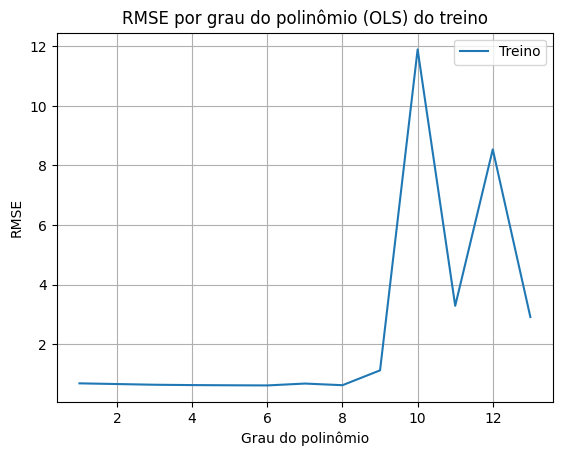

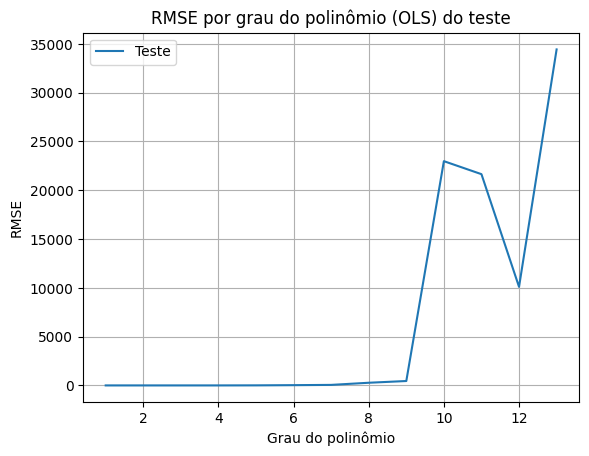

In [ ]:
# Inicializa uma lista para armazenar os erros
rmse_train = []
rmse_test = []

# Calculando a média e a distribuição do target de treinamento
u_train = y_train.sum(axis = 0) / y_train.shape[0]
o_train = np.sqrt(((y_train-u_train)**2).sum(axis=0)/(y_train.shape[0]-1))

# Calculando a média e a distribuição do target de teste
u_test = y_test.sum(axis = 0) / y_test.shape[0]
o_test = np.sqrt(((y_test-u_test)**2).sum(axis=0)/(y_test.shape[0]-1))

# Normaliza os targets de treino e teste
y_train_norm = (y_train - u_train) / o_train
y_test_norm = (y_test - u_test) / o_test

# Função para construir a matriz de características polinomiais
for grau in range(1, 14):
    # Constrói a matriz de características polinomiais normaliza e adicionando o bias
    Xp_train = adicionar_bias(normaliza(construir_X_polynomial(X_train, grau)))
    Xp_test = adicionar_bias(normaliza(construir_X_polynomial(X_test, grau)))

    # Atuzaliza os pesos
    w = treinar_ols(Xp_train, y_train_norm)  

    # Predição e desnormalização
    y_pred_train = Xp_train @ w * o_train + u_train
    y_pred_test = Xp_test @ w * o_test + u_test

    # Calcula o RMSE para treino e teste
    rmse_train.append(np.sqrt(np.mean((y_train - y_pred_train) ** 2)))
    rmse_test.append(np.sqrt(np.mean((y_test - y_pred_test) ** 2)))

# Printar os RMSE de treino e teste
print("RMSE treino:", rmse_train)
print("RMSE teste:", rmse_test)

# Plotar os erros RMSE de treino
plt.plot(range(1, 14), rmse_train, label='Treino')
plt.xlabel('Grau do polinômio')
plt.ylabel('RMSE')
plt.title('RMSE por grau do polinômio (OLS) do treino')
plt.legend()
plt.grid(True)
plt.show()

# Plotar os erros RMSE de teste
plt.plot(range(1, 14), rmse_test, label='Teste')
plt.xlabel('Grau do polinômio')
plt.ylabel('RMSE')
plt.title('RMSE por grau do polinômio (OLS) do teste')
plt.legend()
plt.grid(True)
plt.show()

### Com algoritmo GD

RMSE treino: [np.float64(1.1207939064085786), np.float64(1.1001254752472205), np.float64(1.0867313884672243), np.float64(1.0779597885405143), np.float64(1.0709541288680795), np.float64(1.0656179203185607), np.float64(1.0611772025754118), np.float64(1.0573301968434197), np.float64(1.0542305047715348), np.float64(1.0511888643033862), np.float64(1.048882632650824), np.float64(1.0463503297083032), np.float64(1.0445614445162528)]
RMSE teste: [np.float64(1.041525990385347), np.float64(1.0192852273054909), np.float64(1.0065873804288028), np.float64(0.9993911117782458), np.float64(0.9943436534557395), np.float64(0.9907448223888481), np.float64(0.9880124831982389), np.float64(0.9855609485049205), np.float64(0.983809255338917), np.float64(0.9818671379618334), np.float64(0.9806317824998303), np.float64(0.9789830676909512), np.float64(0.9780591898926951)]


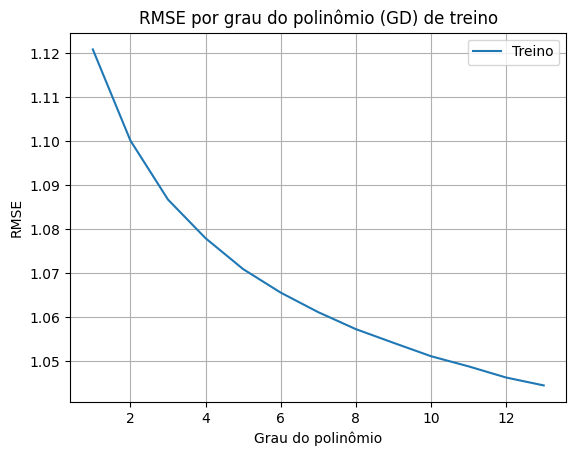

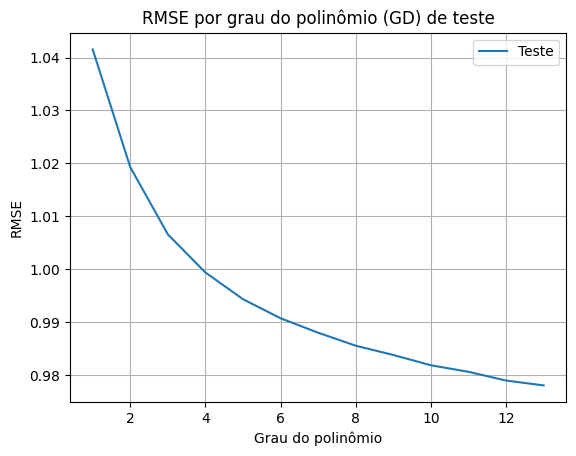

In [139]:
# Inicializa vatores para armazenar os erros
# RMSE para treino e teste
rmse_train = []
rmse_test = []

# Inicializa os parâmetros de aprendizado
# alpha = taxa de aprendizado
alpha = 0.0001
# epochs = número de épocas
epochs = 1000

# Executa o treinamento para cada grau de polinômio
for grau in range(1, 14):
    # Constrói a matriz de características polinomiais normaliza e adicionando o bias
    Xp_train = adicionar_bias(normaliza(construir_X_polynomial(X_train, grau)))
    Xp_test = adicionar_bias(normaliza(construir_X_polynomial(X_test, grau)))

    
    # Inicializa os pesos com zeros
    w = np.zeros((Xp_train.shape[1],1))

    # Loop de treinamento
    for i in range(epochs):
        # Calcula o gradiente
        grad = (1/N) * (Xp_train.T @ (y_train_norm - Xp_train @ w)) 
        # Atualiza os pesos
        w = w + alpha * grad

    # Predição e desnormalização
    y_pred_train = Xp_train @ w * o_train + u_train
    y_pred_test = Xp_test @ w * o_test + u_test

    # Armaznena o RMSE para treino e teste
    rmse_train.append(np.sqrt(np.mean((y_train - y_pred_train) ** 2)))
    rmse_test.append(np.sqrt(np.mean((y_test - y_pred_test) ** 2)))

# Printar os RMSE para treino e teste
print("RMSE treino:", rmse_train)
print("RMSE teste:", rmse_test)

# Plota o RMSE para treino
plt.plot(range(1, 14), rmse_train, label='Treino')
plt.xlabel('Grau do polinômio')
plt.ylabel('RMSE')
plt.title('RMSE por grau do polinômio (GD) de treino')
plt.legend()
plt.grid(True)
plt.show()

# Plota o RMSE para teste
plt.plot(range(1, 14), rmse_test, label='Teste')
plt.xlabel('Grau do polinômio')
plt.ylabel('RMSE')
plt.title('RMSE por grau do polinômio (GD) de teste')
plt.legend()
plt.grid(True)
plt.show()

## Questão 2 d) Repita os 2 itens anteriores incluindo um termo de regularização L2 (por exemplo, com fator λ = 0.01).

### Com o Algoritmo OLS com regularização L2

RMSE treino: [np.float64(0.6837766085801746), np.float64(0.663760294814335), np.float64(0.6520904454419252), np.float64(0.6483451609625881), np.float64(0.6462825135693294), np.float64(0.6450298241737177), np.float64(0.6440799729390866), np.float64(0.6434801123601765), np.float64(0.6430438249440085), np.float64(0.6427171541121152), np.float64(0.6424319639406555), np.float64(0.6421850652702348), np.float64(0.6419581833521681)]
RMSE teste: [np.float64(0.7620991490299985), np.float64(0.62214173049808), np.float64(0.5854530878041838), np.float64(0.602522322192704), np.float64(0.631862115943835), np.float64(0.6568711815491688), np.float64(0.6736104119361047), np.float64(0.6818158483552755), np.float64(0.6840912087628401), np.float64(0.6830974997709311), np.float64(0.6814675773641244), np.float64(0.6801362819645662), np.float64(0.6797043131323623)]


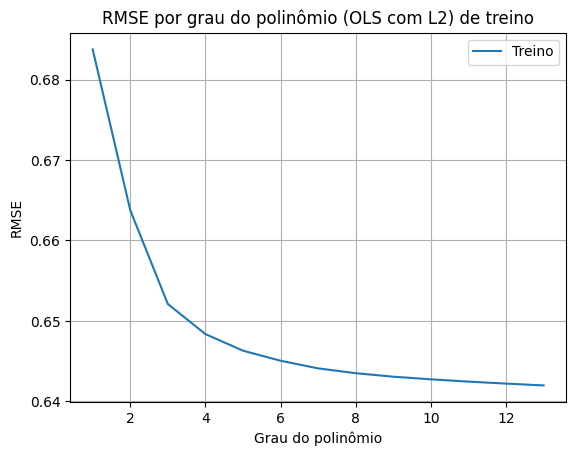

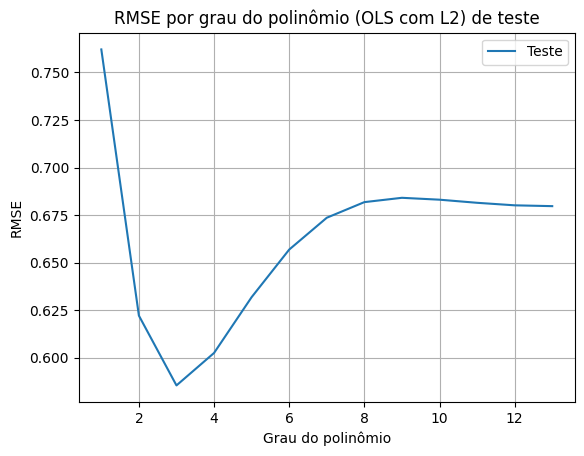

In [143]:
# Inicializa uma lista para armazenar os erros
rmse_train = []
rmse_test = []
    
lambd = 0.01

# Executa o treinamento do modelo de regressão polinomial para cada polinômio com regularização L2 (Ridge)
for grau in range(1, 14):
    # Constrói a matriz de características polinomiais normaliza e adicionando o bias
    Xp_train = adicionar_bias(normaliza(construir_X_polynomial(X_train, grau)))
    Xp_test = adicionar_bias(normaliza(construir_X_polynomial(X_test, grau)))

    # Atuzaliza os pesos
    w = treinar_ridge(Xp_train, y_train_norm,lambd)  

    # Predição e desnormalização
    y_pred_train = Xp_train @ w * o_train + u_train
    y_pred_test = Xp_test @ w * o_test + u_test

    # armazena o RMSE para treino e teste
    rmse_train.append(np.sqrt(np.mean((y_train - y_pred_train) ** 2)))
    rmse_test.append(np.sqrt(np.mean((y_test - y_pred_test) ** 2)))

# Printar o RMSE de treino e teste
print("RMSE treino:", rmse_train)
print("RMSE teste:", rmse_test)

# Plotar os erros RMSE de treino
plt.plot(range(1, 14), rmse_train, label='Treino')
plt.xlabel('Grau do polinômio')
plt.ylabel('RMSE')
plt.title('RMSE por grau do polinômio (OLS com L2) de treino')
plt.legend()
plt.grid(True)
plt.show()

# Plotar os erros RMSE de teste
plt.plot(range(1, 14), rmse_test, label='Teste')
plt.xlabel('Grau do polinômio')
plt.ylabel('RMSE')
plt.title('RMSE por grau do polinômio (OLS com L2) de teste')
plt.legend()
plt.grid(True)
plt.show()

### Com o algoritmo GD com regularização L2

RMSE treino: [np.float64(1.1208113421157455), np.float64(1.1001518410307456), np.float64(1.086762635352527), np.float64(1.0779933552297862), np.float64(1.070989079713856), np.float64(1.0656536523260836), np.float64(1.06121328726467), np.float64(1.0573667248955465), np.float64(1.0542670980330782), np.float64(1.0512258834069752), np.float64(1.048919673241515), np.float64(1.046387842849669), np.float64(1.044599001084344)]
RMSE teste: [np.float64(1.0415454648845008), np.float64(1.0193145055764272), np.float64(1.0066213833326765), np.float64(0.9994270225826926), np.float64(0.9943804132171291), np.float64(0.9907819843640154), np.float64(0.988049633400598), np.float64(0.9855982766367456), np.float64(0.9838463902144664), np.float64(0.9819044631018042), np.float64(0.9806689020758453), np.float64(0.979020413265536), np.float64(0.978096354710215)]


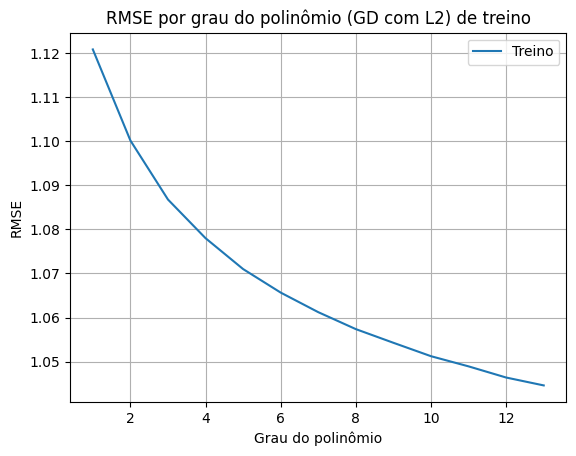

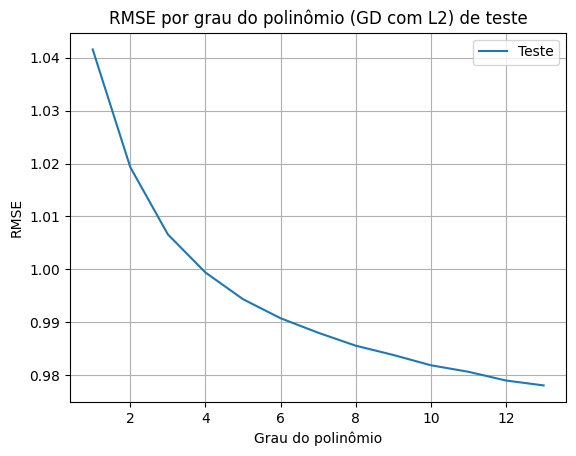

In [144]:
# Inicializa vatores para armazenar os erros
rmse_train = []
rmse_test = []

# Inicializa os parâmetros de aprendizado
alpha = 0.0001
epochs = 1000
lambd = 0.01

# Executa o treinamento para cada grau de polinômio
for grau in range(1, 14):
    # Constrói a matriz de características polinomiais normaliza e adicionando o bias
    Xp_train = adicionar_bias(normaliza(construir_X_polynomial(X_train, grau)))
    Xp_test = adicionar_bias(normaliza(construir_X_polynomial(X_test, grau)))

    # Inicializa os pesos com zeros
    w = np.zeros((Xp_train.shape[1],1))

    # Loop de treinamento
    for i in range(epochs):
        # Calcula o gradiente com regularização L2
        grad = (1/N) * (Xp_train.T @ (y_train_norm - Xp_train @ w)) - lambd *w
        # Atualiza os pesos
        w = w + alpha * grad

    # Predição e desnormalização
    y_pred_train = Xp_train @ w * o_train + u_train
    y_pred_test = Xp_test @ w * o_test + u_test

    # Armaznena o RMSE para treino e teste
    rmse_train.append(np.sqrt(np.mean((y_train - y_pred_train) ** 2)))
    rmse_test.append(np.sqrt(np.mean((y_test - y_pred_test) ** 2)))

# Printar os RMSE para treino e teste
print("RMSE treino:", rmse_train)
print("RMSE teste:", rmse_test)

# Plota o RMSE para treino    
plt.plot(range(1, 14), rmse_train, label='Treino')
plt.xlabel('Grau do polinômio')
plt.ylabel('RMSE')
plt.title('RMSE por grau do polinômio (GD com L2) de treino')
plt.legend()
plt.grid(True)
plt.show()

# Plota o RMSE para teste
plt.plot(range(1, 14), rmse_test, label='Teste')
plt.xlabel('Grau do polinômio')
plt.ylabel('RMSE')
plt.title('RMSE por grau do polinômio (GD com L2) de teste')
plt.legend()
plt.grid(True)
plt.show()